# The Real Estate Market : Analyzing Price House Sale Influencers in King County.
![Image](./logo.jpeg)

## Report Overview.
1. Business Understanding
2. Data Assembly And Preparation
3. Modelling
4. Regression Results
5. Model Refinement and Evaluation
6. Summary.
7. Recommendations.

## 1. Business Understanding.

### 1.a Introduction.
our project is focused on assisting both buyers and sellers in the dynamic real estate market of King County. We understand the unique challenges and opportunities that arise for both parties during the process of buying or selling a property. Our objective is to provide valuable insights and recommendations to help buyers make informed decisions and find their dream homes, while also guiding sellers to optimize their sales strategies and achieve the best possible prices for their properties. Through our analysis of house sales in King County, we aim to empower both buyers and sellers with the knowledge they need to navigate the market successfully.
For our project we will assume that we have two clients:
1. Seller, a resident of King County looking to sell their house for the best price.
2. Buyer, a random person looking to buy a house in King County at an afforable price.

### 1.b Problem Statement.
The real estate market in a King County is highly dynamic and competitive, posing challenges for both buyers and sellers. Our goal is to analyze the factors that significantly influence house sale prices in the area and provide actionable insights and recommendations to guide both buyers and sellers in making informed decisions.

For buyers, understanding the key factors that impact house sale prices is crucial for making sound investment decisions and ensuring they receive fair value for their purchases. By identifying these factors, we can help buyers identify desirable properties, negotiate effectively, and navigate the market to find their ideal homes within their budget.

On the other hand, sellers rely on accurate pricing strategies to maximize their returns and attract potential buyers. By analyzing the factors that influence house sale prices, we can provide sellers with insights to set competitive listing prices, identify areas for improvement in their properties, and position their listings effectively to attract buyers.

By addressing the needs of both buyers and sellers, we aim to bridge the information gap in the real estate market and empower our clients to make data-driven decisions. Through our analysis of the housing market, we will uncover the significant predictors that drive house sale prices, allowing us to provide tailored recommendations to buyers and sellers alike. Our ultimate objective is to equip our clients with the knowledge and insights needed to thrive in King county's competitive real estate landscape.



### 1.c Objective.

Based on the our problem statement, here are the five objectives for the project:
1. Identify Significant Factors: to identify the key factors that significantly influence house sale prices in King County. Through data analysis and statistical modeling, we will determine the predictors that have the most significant impact on house prices. This will involve creating multiple linear regression models to analyze the relationships between various variables and sale prices.

2. Create Linear Regression Models: to create multiple linear regression models to predict house sale prices. By leveraging the identified significant factors, we will develop models that accurately estimate sale prices based on the available data. These models will serve as valuable tools for understanding the relationship between predictor variables and sale prices in the King County real estate market.

3. Analyze Model Performance: to evaluate and analyze the performance of the created linear regression models. We will assess their predictive capabilities, measure metrics such as R-squared, adjusted R-squared, and root mean squared error (RMSE), and compare the models to determine their effectiveness in estimating house sale prices. This analysis will provide insights into the reliability and accuracy of the models.

4. Provide Quantifiable Recommendations to Buyers: to provide quantifiable recommendations to buyers based on the analysis of significant factors. By understanding the factors that influence house sale prices, we will offer actionable insights to help buyers make informed decisions. These recommendations may include guidance on property selection, negotiation strategies, and budget considerations to ensure buyers receive fair value for their purchases.

5. Provide Quantifiable Recommendations to Sellers: to provide quantifiable recommendations to sellers to optimize their pricing strategies and attract potential buyers. Based on the analysis of significant factors, we will offer insights on setting competitive listing prices, identifying property improvements, and positioning listings effectively in the market. These recommendations will empower sellers to maximize their returns and effectively navigate the competitive real estate landscape in King County.



### 1.d Metrics for success.

Based on the objectives of the project, the following metrics can be considered for evaluating the success of the project:

1. **R-squared (Coefficient of Determination)**: R-squared measures the proportion of the variance in the dependent variable (price) that can be explained by the independent variables in the model. A higher R-squared indicates a better fit to the data, with values closer to 1 indicating a stronger relationship between the predictors and the target variable.

2. **Adjusted R-squared**: Adjusted R-squared takes into account the number of predictors in the model and adjusts the R-squared value accordingly. It penalizes the addition of irrelevant variables and provides a more reliable measure of model fit.

3. **F-statistic**: The F-statistic assesses the overall significance of the regression model by comparing the variation explained by the model to the unexplained variation. A higher F-statistic with a low p-value indicates a statistically significant relationship between the predictors and the dependent variable.

4. **Durbin-Watson Statistic**: The Durbin-Watson statistic measures the autocorrelation of the residuals, indicating whether there is any correlation or pattern remaining in the residuals. Values between 0 and 2 suggest no significant autocorrelation.

5. **Significance of Coefficients**: The significance of individual coefficients can be evaluated using their p-values. Lower p-values (typically less than 0.05) indicate that the predictor variables have a statistically significant impact on the dependent variable.


## 2. Data Assembly And Preparation

In [63]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder, StandardScaler , OrdinalEncoder
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [64]:
##loading the dataset.
kingCountySales=pd.read_csv('./data/kc_house_data.csv')
##a simple overview of our data
kingCountySales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

### 2.a Data Understanding.
The dataset used for our project contains information on house sales in King County. It includes various columns that provide valuable insights into the housing market. Here is a brief description of the dataset based on the available columns:

- `id`: This column represents a unique identifier for each house, allowing us to distinguish and track individual transactions.

- `date`: The date column captures the specific date of each house sale, enabling us to analyze trends and temporal patterns in the housing market.

- `price`: The price column indicates the sale price of each house, serving as our target variable for analysis and modeling. This column is crucial for understanding the monetary value associated with different properties.

- `bedrooms`: This column records the number of bedrooms in each house, providing insights into the size and accommodation capacity of the properties.

- `bathrooms`: The bathrooms column represents the number of bathrooms in each house, reflecting the level of comfort and convenience offered by the properties.

- `sqft_living`: This column denotes the square footage of the interior living space of each house, offering an indicator of the overall size and spaciousness of the properties.

- `sqft_lot`: The sqft_lot column represents the square footage of the land area associated with each property, providing information on the size of the lots.

- `floors`: This column captures the number of floors in each house, indicating the vertical layout and architectural structure of the properties.

- `waterfront`: The waterfront column indicates Whether the house is on a waterfront by use of yes or no where applicable

- `view`: The view column represents the Quality of view from house

- `condition`: This column reflects the condition of each house, providing insights into its overall state and maintenance level.

- `grade`: The grade column represents the overall grade given to the construction and design of each property. This variable can reflect the quality and craftsmanship of the houses.

- `sqft_above`: This column denotes the square footage of the house above ground level, providing additional information on the living space area.

- `sqft_basement`: The sqft_basement column represents the square footage of the house's basement, if applicable. This variable can offer insights into additional usable space in the properties.

- `yr_built`: This column captures the year each house was built, serving as an indicator of its age and historical context.

- `yr_renovated`: The yr_renovated column denotes the year each house was last renovated. It provides information on recent updates or improvements made to the properties.

- `zipcode`: This column represents the zip code of the location where each house is situated, allowing for analysis of geographical patterns and regional variations in the housing market.

- `lat` and `long`: These columns provide the latitude and longitude coordinates of each house's location, offering precise geographic information for spatial analysis and mapping.

* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors

The dataset's columns encompass various aspects of the properties, including their physical attributes, location-related features, and sale prices. By analyzing these variables, we can gain valuable insights into the housing market in King County and identify the factors that significantly influence house sale prices.

### 2.b Data Preparation.


### 2.b.1 Handling Missing Values.
The strategy used was dropping all rows that have null or none values

In [34]:
#Dropping rows with NaN values
kingCountySales=kingCountySales.dropna().reset_index(drop=True)
#checking if there are NaN values in the dataset
kingCountySales.isna().sum()
#remove "?" values by droping the rows tha have it
kingCountySales=kingCountySales.drop(kingCountySales[kingCountySales['sqft_basement']=="?"].index).reset_index(drop=True)
kingCountySales['sqft_basement'] = pd.to_numeric(kingCountySales['sqft_basement'])

### 2.b.2 Handling categorical data
Based on the provided column information, the following columns can be considered categorical variables:

1. waterfront: This column is of object type and represents whether the house is located on a waterfront. It is likely a binary categorical variable with categories like "Yes" or "No".

2. view: The view column is of object type and represents the quality of the view from the house. It may have multiple categories indicating different view qualities, such as "None", "Fair", "Good", and "Excellent".
9
3. condition: The condition column is of object type and represents the overall condition of the house. It is likely a categorical variable with multiple categories, such as "Poor", "Fair", "Good", "Very Good", and "Excellent".

4. grade: The grade column is of object type and represents the overall grade of the house. It is likely a categorical variable with multiple categories, such as "Low", "Average Grade", "High Grade", or specific grade codes provided by the King County Assessor.

In [35]:
##fixing categorical data in Waterfront column using label encoding
waterfrontMapping = {'YES': 1, 'NO': 0}
# Using the 'map()' function to perform the encoding
kingCountySales['waterfront'] = kingCountySales['waterfront'].map(waterfrontMapping)
##fixing categorical data in views column using label encoding
kingCountySales['view']= LabelEncoder().fit_transform(kingCountySales['view'])
##fixing categorical data in condition column using label encoding
kingCountySales['condition']= LabelEncoder().fit_transform(kingCountySales['condition'])
##fixing categorical data in grade column by stripping the value from '7 Average' to 7
gradeMapping={}
##gradeMapping will look like {'7 Average': 7,'8 Good': 8,...}
for grade in list(kingCountySales['grade'].unique()):
    gradeMapping[grade]=int(grade.split(' ')[0])

kingCountySales['grade']=kingCountySales['grade'].map(gradeMapping)
# converting year_renovated from float to int
kingCountySales['yr_renovated']=kingCountySales['yr_renovated'].astype(int)
#converting date form day/month/year to just year
kingCountySales['date']=pd.Series(pd.to_datetime(kingCountySales['date']).dt.year)

### 2.c Finding columns with skewness.
we are doing this to find columns that are either negatively or positively skewed so that we can apply Box-Cox transformation on them. This will be helpful in forcing our independent variables to follow a distribution closer to Normal distribution.

In [36]:
# Calculate skewness for each column
skewed_cols = []
for column in kingCountySales.columns:
    if kingCountySales[column].dtype != object:  # Exclude non-numeric columns
        skewness = skew(kingCountySales[column])
        if skewness > 1 or skewness < -1:  # Define a threshold for skewness
            skewed_cols.append(column)

skewed_cols

['price',
 'bedrooms',
 'sqft_living',
 'sqft_lot',
 'waterfront',
 'view',
 'condition',
 'sqft_above',
 'sqft_basement',
 'yr_renovated',
 'sqft_living15',
 'sqft_lot15']

#### Visualize Skewness: 
visualization to assess the skewness of the columns This can help you understand the distribution shape and confirm the results from the skewness calculation.

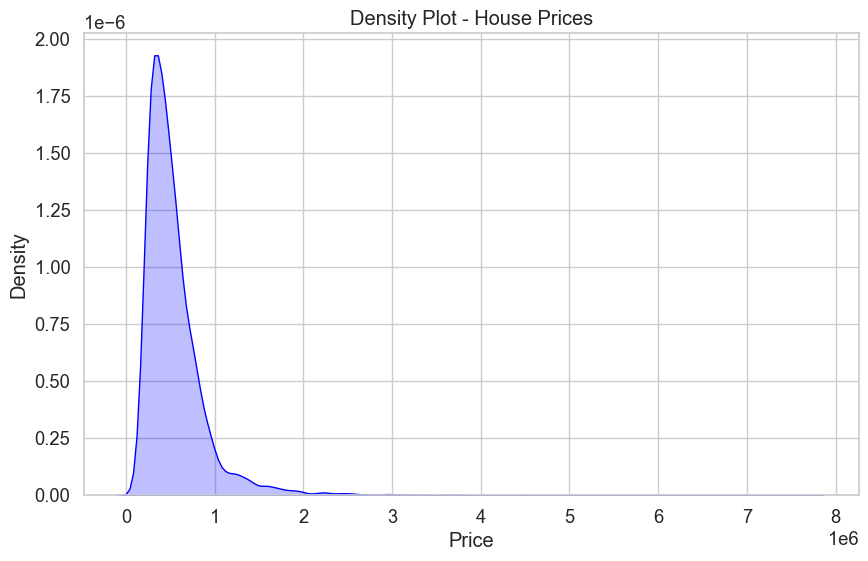

In [37]:
# Set the figure size and style
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid", font_scale=1.2)

# Create the density plot
sns.kdeplot(data=kingCountySales, x='price', fill=True, color='blue')

# Set plot title and labels
plt.title('Density Plot - House Prices')
plt.xlabel('Price')
plt.ylabel('Density')

# Display the plot
plt.show()


the dataset is positively skewed.

Positively skewed data refers to a distribution where the tail of the data points towards the right side of the distribution. In other words, the majority of the data points are concentrated towards the left side of the distribution, while the right side has a long tail of relatively few extreme values.

#### Applying log Transformation: 
Log transformation is commonly applied to positively skewed data to reduce the skewness and make the distribution more symmetric or closer to a normal distribution. There are several reasons why log transformation is useful for positively skewed data:

1. **Equalizing variances**: Applying a log transformation can help in equalizing the variances across different values of the predictor variable. This can be particularly beneficial in regression analysis, as it can improve the stability and accuracy of the model.

2. **Normalization**: Log transformation can normalize the data and make it closer to a normal distribution. Normality assumption is often required for many statistical techniques, such as hypothesis testing, confidence intervals, and parametric models. By transforming the data, we can meet the assumptions of these techniques and obtain more reliable results.

3. **Linearity**: Log transformation can also address issues of non-linearity in the relationship between variables. It can help in transforming exponential growth or decay patterns into linear relationships, which can be more easily modeled and interpreted.

4. **Outlier reduction**: Log transformation can reduce the influence of extreme values or outliers in the data. Positively skewed data often have a long right tail with a few high values. By applying a log transformation, the effect of these extreme values is reduced, and the distribution becomes more symmetric.

5. **Interpretability**: Log-transformed variables can have a more interpretable relationship. For example, in economic or financial data, using logarithmic transformations can help interpret percentage changes or growth rates instead of absolute differences.


In [38]:
# Apply log transformation to skewed columns
for column in skewed_cols:
    kingCountySales[column] = np.log1p(kingCountySales[column])

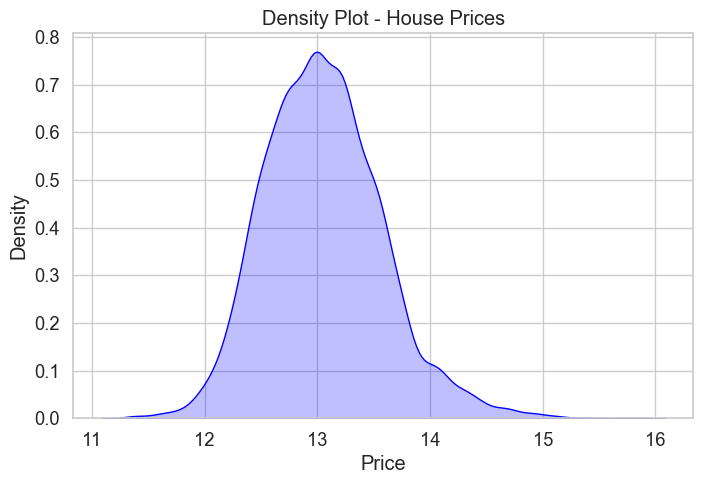

In [39]:
# Set the figure size and style
plt.figure(figsize=(8,5))
sns.set(style="whitegrid", font_scale=1.2)

# Create the density plot
sns.kdeplot(data=kingCountySales, x='price', fill=True, color='blue')

# Set plot title and labels
plt.title('Density Plot - House Prices')
plt.xlabel('Price')
plt.ylabel('Density')

# Display the plot
plt.show()


### 2.d Finding and removing outliers from our dataset
There are several reasons for finding and removing outliers from a dataset:

1. **Data Quality**: Outliers can be the result of data entry errors, measurement errors, or other data quality issues. Removing outliers helps improve the overall quality and accuracy of the dataset.

2. **Influence on Analysis**: Outliers can have a significant impact on statistical analysis, such as calculating summary statistics, estimating parameters in regression models, or computing averages. By removing outliers, we can ensure that our analysis is not heavily influenced by these extreme values and obtain more reliable results.

3. **Violation of Assumptions**: Many statistical techniques assume that the data follow a specific distribution or have certain properties. Outliers can violate these assumptions and lead to biased or misleading results. Removing outliers helps in meeting the assumptions of the analysis and ensures the validity of the results.

4. **Model Performance**: In machine learning and predictive modeling, outliers can adversely affect the performance of the models. Outliers can introduce noise, increase error rates, or bias the model towards predicting extreme values. Removing outliers can help improve the accuracy and robustness of the models.

5. **Data Interpretation**: Outliers can distort the interpretation of the data and lead to incorrect conclusions. By removing outliers, we can gain a clearer understanding of the underlying patterns and relationships in the data.

In [40]:
from scipy.stats import zscore
# Calculate z-scores for each column
z_scores = np.abs(zscore(kingCountySales))

# Define a threshold for outliers
threshold = 4

# Create a boolean mask indicating outliers
outlier_mask = (z_scores > threshold).any(axis=1)

# Remove outliers from the dataset
data_no_outliers = kingCountySales[~outlier_mask]


### 2.e Data scaling / standardization.
Data standardization, also known as data normalization, is the process of transforming numerical data to a standardized scale. It involves subtracting the mean and dividing by the standard deviation of each variable, which results in a mean of zero and a standard deviation of one for the standardized variables.

One of the rationales for data standardization is to address the issue of scale differences between variables. When variables are measured in different units or have significantly different ranges, it can lead to biased and unstable results in certain statistical analyses, particularly those based on distance or magnitude comparisons. Standardizing the variables brings them to a common scale, ensuring that they contribute equally to the analysis and reducing the impact of scale differences.

The condition number is a measure of the stability and robustness of a matrix in numerical computations. In the context of regression analysis, the condition number of the design matrix, which is formed by the predictor variables, can indicate the presence of multicollinearity. High condition numbers suggest that the predictor variables are highly correlated, making the estimation of regression coefficients sensitive to small changes in the data.

Data standardization can help mitigate the effects of multicollinearity on the condition number. By standardizing the variables, the range and scale differences are removed, reducing the correlation between the variables and improving the condition number. This improves the stability and reliability of the regression analysis, making the estimates of regression coefficients more robust and interpretable.

Data standardization is an important step in data preprocessing to address scale differences and improve the stability of statistical analyses. It can help reduce the impact of multicollinearity on the condition number, leading to more reliable and meaningful results in regression analysis.

In [41]:
# Select the columns you want to standardize
columns_to_standardize = list(kingCountySales.columns)

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the selected columns
scaler.fit(kingCountySales[columns_to_standardize])

# Transform the selected columns using the scaler
kingCountySales[columns_to_standardize] = scaler.transform(kingCountySales[columns_to_standardize])


In [42]:
###our dataset
kingCountySales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.633206,-0.689135,0.277349,-0.326986,0.167525,0.703955,-0.120272,0.937944,-0.087036,0.277537,...,-0.565897,0.665924,1.091443,-0.687354,4.836994,0.889072,1.165773,-0.750951,-0.334701,-0.031898
1,-0.732816,-0.689135,0.497098,0.735092,1.145357,0.064100,-0.529395,-0.917738,-0.087036,0.277537,...,-0.565897,-1.034198,1.350207,-0.209326,-0.206667,1.094841,-0.277205,-1.277732,-0.999072,-0.553187
2,-0.918157,1.451095,0.175849,-0.326986,-0.158420,-0.299877,0.000654,-0.917738,-0.087036,0.277537,...,0.286096,0.066445,-0.798711,0.541860,-0.206667,-0.064950,0.414733,1.199563,-0.141840,-0.053993
3,0.919653,-0.689135,1.847692,0.735092,3.101023,2.466330,2.800445,-0.917738,-0.087036,0.277537,...,2.842074,2.033338,1.513912,1.019888,-0.206667,-0.457783,0.697995,1.484310,2.833032,3.155302
4,-0.758071,1.451095,-1.340552,-0.326986,-1.462197,-0.163358,-0.086038,-0.917738,-0.087036,0.277537,...,-0.565897,-1.034198,1.280791,-0.380050,-0.206667,1.281905,-0.338470,-0.879087,-0.176014,0.042149


## 3. Modelling.

### 3.a Training strategy.
we will create a baseline model and from there we will try to improve the r squared by adding more indeependent variables

### Determining correlation of all columns to price

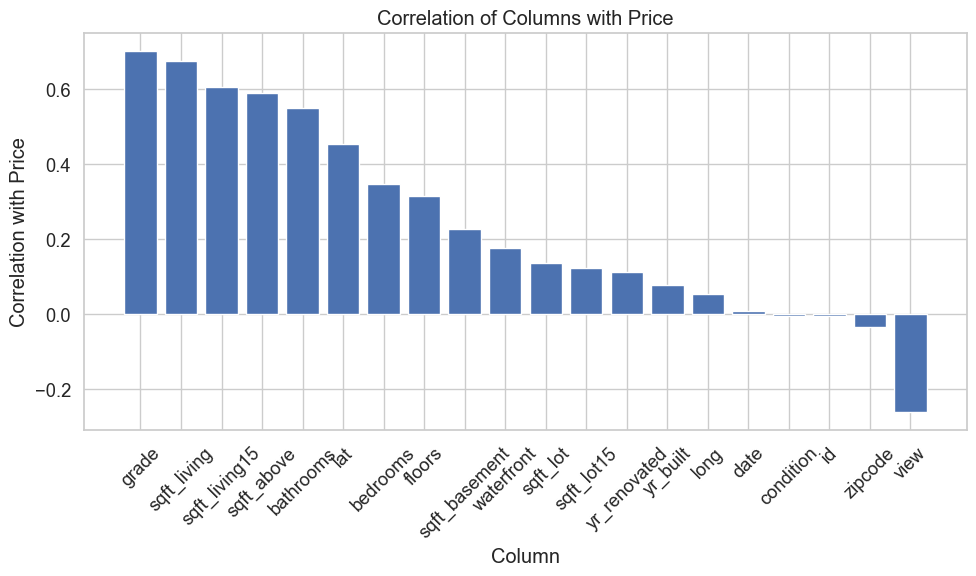

In [43]:
##visualizing correlation of all columns to price
corr_matrix = kingCountySales.corr()['price'].drop('price')
# Sort the correlation values in descending order
corr_sorted = corr_matrix.sort_values(ascending=False)
# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(corr_sorted.index, corr_sorted.values)
plt.xticks(rotation=45)
plt.xlabel('Column')
plt.ylabel('Correlation with Price')
plt.title('Correlation of Columns with Price')
plt.tight_layout()
plt.show()


### Analysis of all columns and their correlation to price
The correlation coefficients indicate the strength and direction of the linear relationship between each variable and the target variable (price). Here is an analysis of the correlations:

- id: There is a weak negative correlation (-0.005) between id and price. This suggests that there is little to no relationship between the unique identifier of the house and its price.

- date: There is a very weak positive correlation (0.010) between date and price. This indicates that there is a slight tendency for more recent dates to be associated with higher prices, but the relationship is not substantial.

- price: The correlation coefficient is 1.000, which is the highest possible value since it represents the correlation of a variable with itself.

- bedrooms: There is a moderate positive correlation (0.348) between the number of bedrooms and price. This suggests that houses with more bedrooms tend to have higher prices.

- bathrooms: There is a relatively strong positive correlation (0.551) between the number of bathrooms and price. This indicates that houses with more bathrooms tend to have higher prices.

- sqft_living: There is a relatively strong positive correlation (0.676) between the square footage of the living area and price. This suggests that larger houses tend to have higher prices.

- sqft_lot: There is a weak positive correlation (0.137) between the square footage of the lot and price. This indicates that houses with larger lots may have slightly higher prices, but the relationship is not very strong.

- floors: There is a moderate positive correlation (0.315) between the number of floors and price. This suggests that houses with more floors tend to have higher prices.

- waterfront: There is a weak positive correlation (0.178) between waterfront property and price. This suggests that houses with a waterfront view may have slightly higher prices.

- view: There is a weak negative correlation (-0.260) between the view of the property and price. This indicates that houses with better views may have slightly lower prices.

- condition: There is a very weak negative correlation (-0.005) between the condition of the house and price. This suggests that there is little to no relationship between the condition of the house and its price.

- grade: There is a relatively strong positive correlation (0.703) between the grade of the house and price. This indicates that houses with higher grades tend to have higher prices.

- sqft_above: There is a relatively strong positive correlation (0.590) between the square footage of the house above ground level and price. This suggests that the size of the above-ground living area is positively associated with the price.

- sqft_basement: There is a weak positive correlation (0.229) between the square footage of the basement and price. This indicates that houses with larger basements may have slightly higher prices.

- yr_built: There is a very weak positive correlation (0.079) between the year the house was built and price. This suggests that there is little to no relationship between the age of the house and its price.

- yr_renovated: There is a weak positive correlation (0.112) between the year of renovation and price. This indicates that houses that have been renovated more recently may have slightly higher prices.

- zipcode: There is a very weak negative correlation (-0.035) between the zipcode of the house and price. This suggests that there is little to no relationship between the zipcode and the price.

- lat: There is a moderate positive correlation (0.454) between the latitude of the location and price. This indicates that houses located at higher latitudes may have slightly higher prices.

- long: There is a very weak positive correlation (0.054) between the longitude of the location and price. This suggests that there is little to no relationship between the longitude and the price.

- sqft_living15: There is a relatively strong positive correlation (0.606) between the square footage of the living area in 2015 (neighborhood average) and price. This suggests that the size of the living area relative to the neighborhood average is positively associated with the price.

- sqft_lot15: There is a weak positive correlation (0.124) between the square footage of the lot in 2015 (neighborhood average) and price. This indicates that the size of the lot relative to the neighborhood average may have a slight influence on the price.

Overall, these correlation coefficients provide insights into the relationships between the variables and the price of the houses. It is important to note that correlation does not imply causation, and further analysis and modeling are required to understand the true impact and significance of these variables on the price.

## 3.b Creating models.

### creating the baseline model

The baseline model may not capture all the intricacies of the data, it provides a starting point for evaluating model performance and guiding the development of more advanced models. It allows us to establish a reference level of performance and helps to determine the value added by subsequent modeling efforts.
To identify the independent variable for our baseline model, we will pick the column with highest correlation to price 

*grade has highest corelation to price*

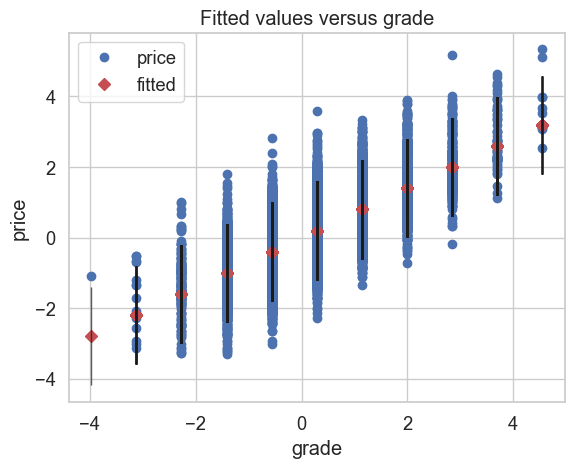

In [44]:
X = kingCountySales[['grade']]
y = kingCountySales['price']
# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the baseline model
baseline_results=baseline_model = sm.OLS(y, X).fit()

#plot the model
sm.graphics.plot_fit(baseline_results, "grade")

plt.show()

plotting the regression line:

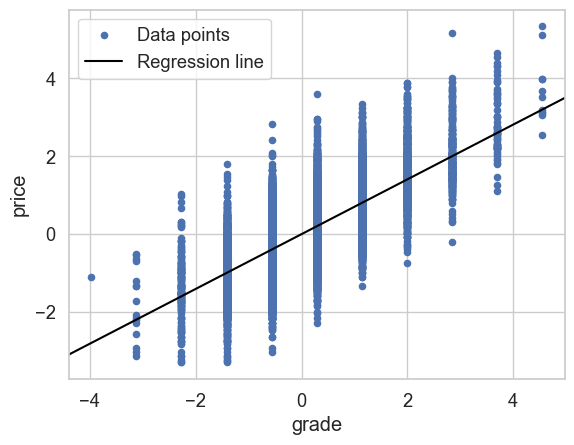

In [45]:
fig, ax = plt.subplots()
kingCountySales.plot.scatter(x="grade", y="price", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=baseline_results, label="Regression line", ax=ax, color="black")
ax.legend();

ploting the residuals:

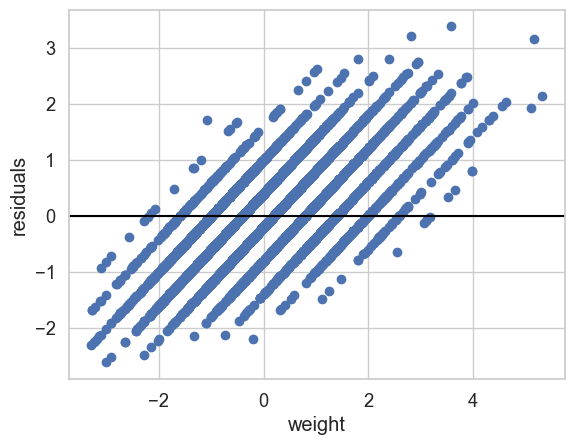

In [46]:
fig, ax = plt.subplots()

ax.scatter(kingCountySales["price"], baseline_results.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("weight")
ax.set_ylabel("residuals");

In [47]:
# Print the summary statistics
print(baseline_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                 1.509e+04
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        23:03:22   Log-Likelihood:                -16631.
No. Observations:               15429   AIC:                         3.327e+04
Df Residuals:                   15427   BIC:                         3.328e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.182e-16      0.006   1.25e-13      1.0

### Analysis of the baseline model

- R-squared: The R-squared value is 0.494, which means that approximately 49.4% of the variation in the price can be explained by the grade variable in the model. This indicates a moderate level of goodness-of-fit, suggesting that the grade has some predictive power in determining the price.

- F-statistic: The F-statistic has a very high value of 1.509e+04, and the associated p-value is 0.00. This indicates that there is a significant relationship between the independent variable (grade) and the dependent variable (price), as the p-value is less than the conventional threshold of 0.05. Therefore, the overall model is statistically significant.

- Coefficients: The coefficient for the constant term is very close to zero (7.182e-16), indicating that it does not have a substantial impact on the price. The coefficient for the grade variable is 0.7032, suggesting that for each unit increase in grade, there is a corresponding increase in the price by 0.7032 units.

- Standard Errors and t-statistics: The standard errors provide an estimate of the uncertainty in the coefficient estimates. The t-statistic for the grade variable is very high (122.829), and the associated p-value is 0.00. This indicates that the coefficient is statistically significant, suggesting that the grade variable has a strong impact on the price.

- Confidence Intervals: The 95% confidence interval for the grade coefficient ranges from 0.692 to 0.714. This means that we can be 95% confident that the true population value of the grade coefficient lies within this interval.

- Residuals: The Omnibus test, Jarque-Bera test, and skewness and kurtosis values assess the normality assumption of the residuals. A low probability value (0.000) in the Omnibus and Jarque-Bera tests indicates that the residuals deviate significantly from a normal distribution. The skewness value (0.186) is close to zero, suggesting a relatively symmetrical distribution. The kurtosis value (3.130) indicates a moderate level of peakedness in the distribution of the residuals.

The analysis indicates that the grade variable has a significant positive relationship with the price. However, it's important to consider the limitations of the model and conduct further analysis to assess the adequacy of the model's assumptions and potential inclusion of additional variables to improve the model's performance.

## model 2

In [48]:
#we will add a new independent variable,
#the new independent variable is the column with second highest corelation to price 
#our new independent variable will be sqft_living with a correlation of 0.676
X2 = kingCountySales[['grade','sqft_living']]
y = kingCountySales['price']

# Add a constant term to the independent variables
X2 = sm.add_constant(X2)

# Fit the baseline model
model2 = sm.OLS(y, X2).fit()


ploting the partial regression plots for model 2

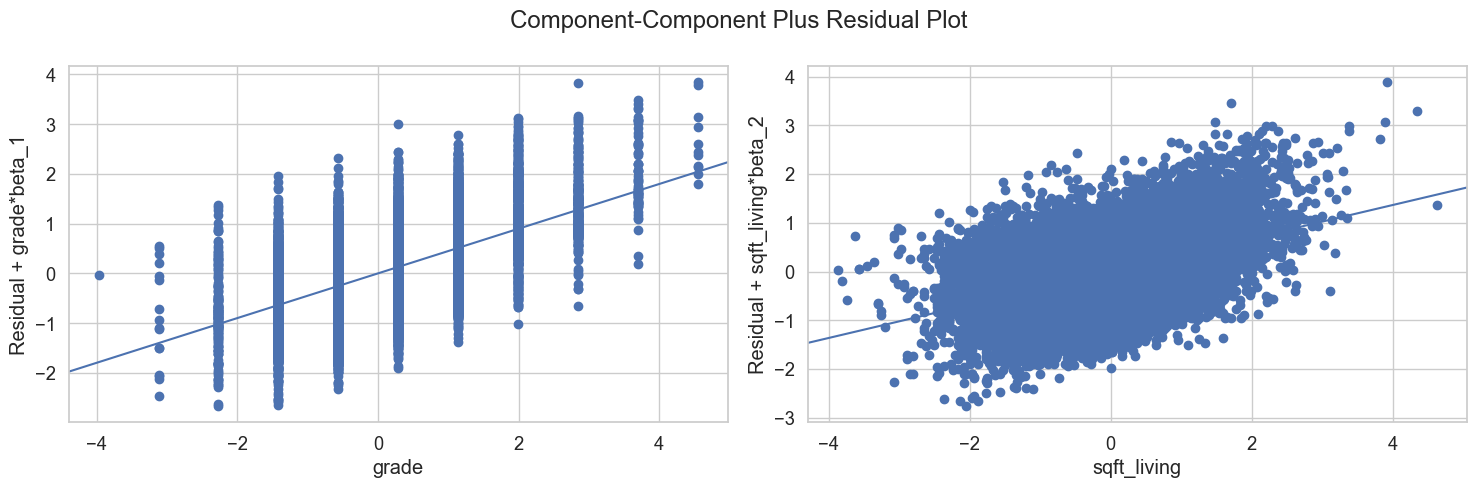

In [49]:
fig = plt.figure(figsize=(15,5))
sm.graphics.plot_ccpr_grid(model2, exog_idx=["grade", "sqft_living"], grid=(1,2), fig=fig)
plt.tight_layout()
plt.show()

In [50]:
# Print the summary statistics
print(model2.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     9283.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        23:03:24   Log-Likelihood:                -15798.
No. Observations:               15429   AIC:                         3.160e+04
Df Residuals:                   15426   BIC:                         3.162e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.182e-16      0.005   1.32e-13      

### Analysis of model 2
The results show the summary of a linear regression model with price as the dependent variable and grade and sqft_living as the independent variables. Here is a brief analysis:

- R-squared: The R-squared value is 0.546, which means that approximately 54.6% of the variation in the price can be explained by the grade and sqft_living variables in the model. This indicates a moderate level of goodness-of-fit, suggesting that these two variables have some predictive power in determining the price.

- Adjusted R-squared: The adjusted R-squared value is the same as the R-squared value (0.546) in this case, indicating that there is no penalty for the number of predictors in the model. This suggests that the inclusion of grade and sqft_living as independent variables has adequately accounted for the complexity of the model.

- F-statistic: The F-statistic has a high value of 9283, and the associated p-value is 0.00. This indicates that there is a significant relationship between the independent variables (grade and sqft_living) and the dependent variable (price), as the p-value is less than the conventional threshold of 0.05. Therefore, the overall model is statistically significant.

- Coefficients: The coefficient for the constant term is very close to zero (7.182e-16), indicating that it does not have a substantial impact on the price. The coefficient for the grade variable is 0.4491, suggesting that for each unit increase in grade, there is a corresponding increase in the price by 0.4491 units. The coefficient for the sqft_living variable is 0.3410, indicating that for each unit increase in sqft_living, there is a corresponding increase in the price by 0.3410 units.

- Standard Errors and t-statistics: The standard errors provide an estimate of the uncertainty in the coefficient estimates. The t-statistics for both the grade and sqft_living variables are very high (55.237 and 41.941, respectively), and the associated p-values are 0.00. This indicates that both coefficients are statistically significant, suggesting that grade and sqft_living have a strong impact on the price.

- Confidence Intervals: The 95% confidence intervals for the grade and sqft_living coefficients indicate that we can be 95% confident that the true population values of these coefficients lie within their respective intervals.

- Residuals: The Omnibus test, Jarque-Bera test, and skewness and kurtosis values assess the normality assumption of the residuals. A low probability value (0.000) in the Omnibus test indicates that the residuals deviate significantly from a normal distribution. The skewness value (0.169) is close to zero, suggesting a relatively symmetrical distribution. The kurtosis value (2.905) indicates a moderate level of peakedness in the distribution of the residuals.

The analysis indicates that both the grade and sqft_living variables have a significant positive relationship with the price. However, it's important to consider the limitations of the model and conduct further analysis to assess the adequacy of the model's assumptions and potential inclusion of additional variables to improve the model's performance.

## model 3

In [51]:
#we will add two more independent variable,
#the independent variable we will add are 'latitude','view'
X3 = kingCountySales[['grade','sqft_living','lat','view']]
y = kingCountySales['price']

# Add a constant term to the independent variables
X3 = sm.add_constant(X3)

# Fit the model
model3 = sm.OLS(y, X3).fit()


eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


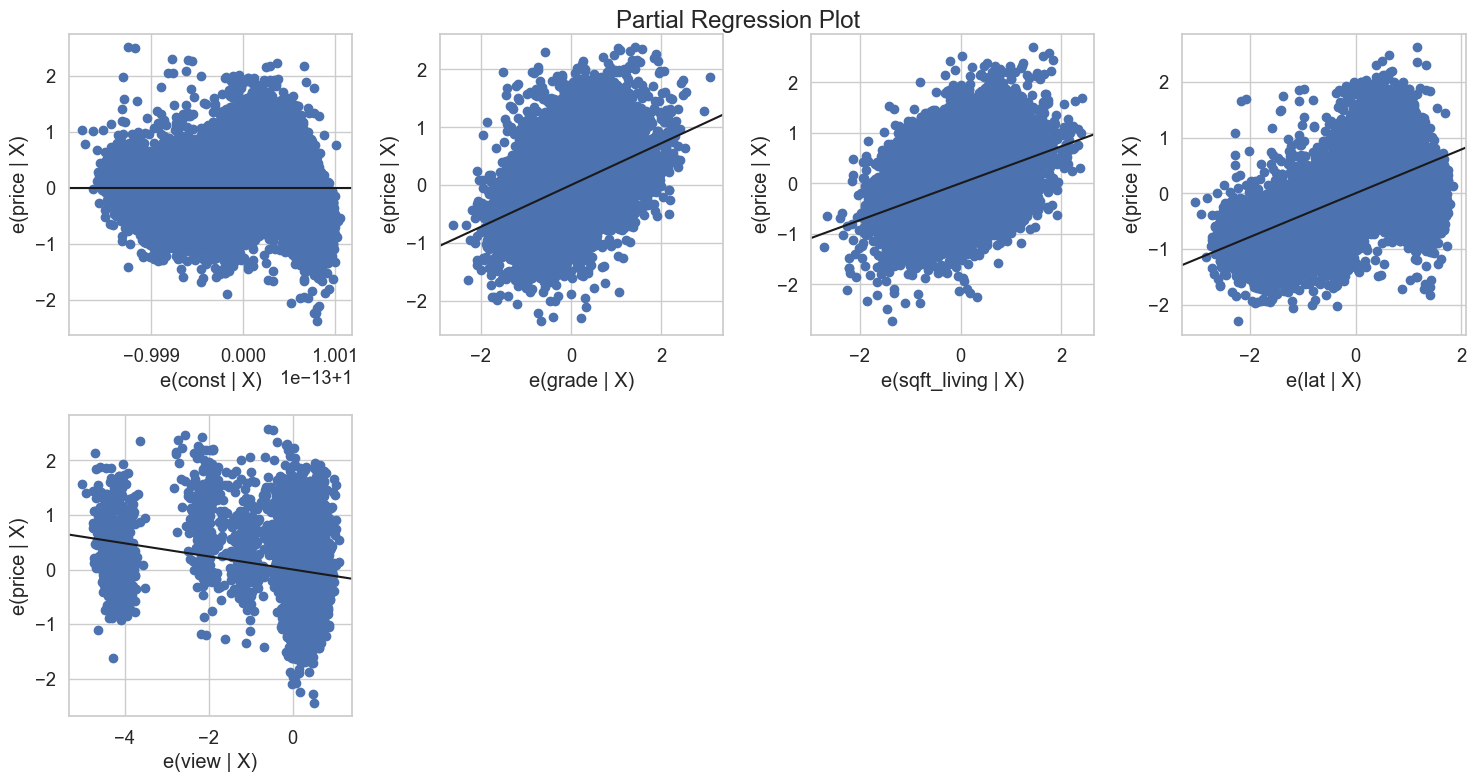

In [52]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_partregress_grid(model3,exog_idx=list(X3.columns.values),grid=(2,4),fig=fig)
plt.show()

In [62]:
# Print the summary statistics
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     9483.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        23:03:33   Log-Likelihood:                -12319.
No. Observations:               15429   AIC:                         2.465e+04
Df Residuals:                   15424   BIC:                         2.469e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.204e-14      0.004   5.09e-12      

### Analysis of model 3

- R-squared: The R-squared value is 0.711, which means that approximately 71.1% of the variation in the price can be explained by the grade, sqft_living, lat, and view variables in the model. This indicates a relatively high level of goodness-of-fit, suggesting that these variables have substantial predictive power in determining the price.

- Adjusted R-squared: The adjusted R-squared value is the same as the R-squared value (0.711) in this case, indicating that there is no penalty for the number of predictors in the model. This suggests that the inclusion of grade, sqft_living, lat, and view as independent variables has adequately accounted for the complexity of the model.

- F-statistic: The F-statistic has a high value of 9483, and the associated p-value is 0.00. This indicates that there is a significant relationship between the independent variables (grade, sqft_living, lat, and view) and the dependent variable (price), as the p-value is less than the conventional threshold of 0.05. Therefore, the overall model is statistically significant.

- Coefficients: The coefficient for the constant term is very close to zero (2.204e-14), indicating that it does not have a substantial impact on the price. The coefficient for the grade variable is 0.3617, suggesting that for each unit increase in grade, there is a corresponding increase in the price by 0.3617 units. The coefficient for the sqft_living variable is 0.3656, indicating that for each unit increase in sqft_living, there is a corresponding increase in the price by 0.3656 units. The coefficient for the lat variable is 0.3930, suggesting that for each unit increase in lat, there is a corresponding increase in the price by 0.3930 units. The coefficient for the view variable is -0.1200, indicating that the presence of a view is associated with a decrease in the price by 0.1200 units.

- Standard Errors and t-statistics: The standard errors provide an estimate of the uncertainty in the coefficient estimates. The t-statistics for all the variables are very high, and the associated p-values are 0.00. This indicates that all the coefficients are statistically significant, suggesting that grade, sqft_living, lat, and view have a strong impact on the price.

- Confidence Intervals: The 95% confidence intervals for the coefficients indicate that we can be 95% confident that the true population values of these coefficients lie within their respective intervals.

- Residuals: The Omnibus test, Jarque-Bera test, and skewness and kurtosis values assess the normality assumption of the residuals. The Omnibus test has a low probability value (0.000), indicating that the residuals deviate significantly from a normal distribution. The skewness value (0.369) is close to zero, suggesting a relatively symmetrical distribution. The kurtosis value (3.741) indicates a moderate level of peakedness in the distribution of the residuals.

The analysis indicates that the grade, sqft_living, lat, and view variables have a significant impact on the price. However, it's important to consider the limitations of the model and conduct further analysis to assess the adequacy of the model's assumptions and potential inclusion of additional variables to improve the model's performance.

## model 4

In [54]:
#we will add two more independent variable,
#the independent variable we will add are 'condition','year built'
X4 = kingCountySales[['grade','sqft_living','lat','view','condition','yr_built']]
y = kingCountySales['price']

# Add a constant term to the independent variables
X4 = sm.add_constant(X4)

# Fit the model
model4 = sm.OLS(y, X4).fit()


eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


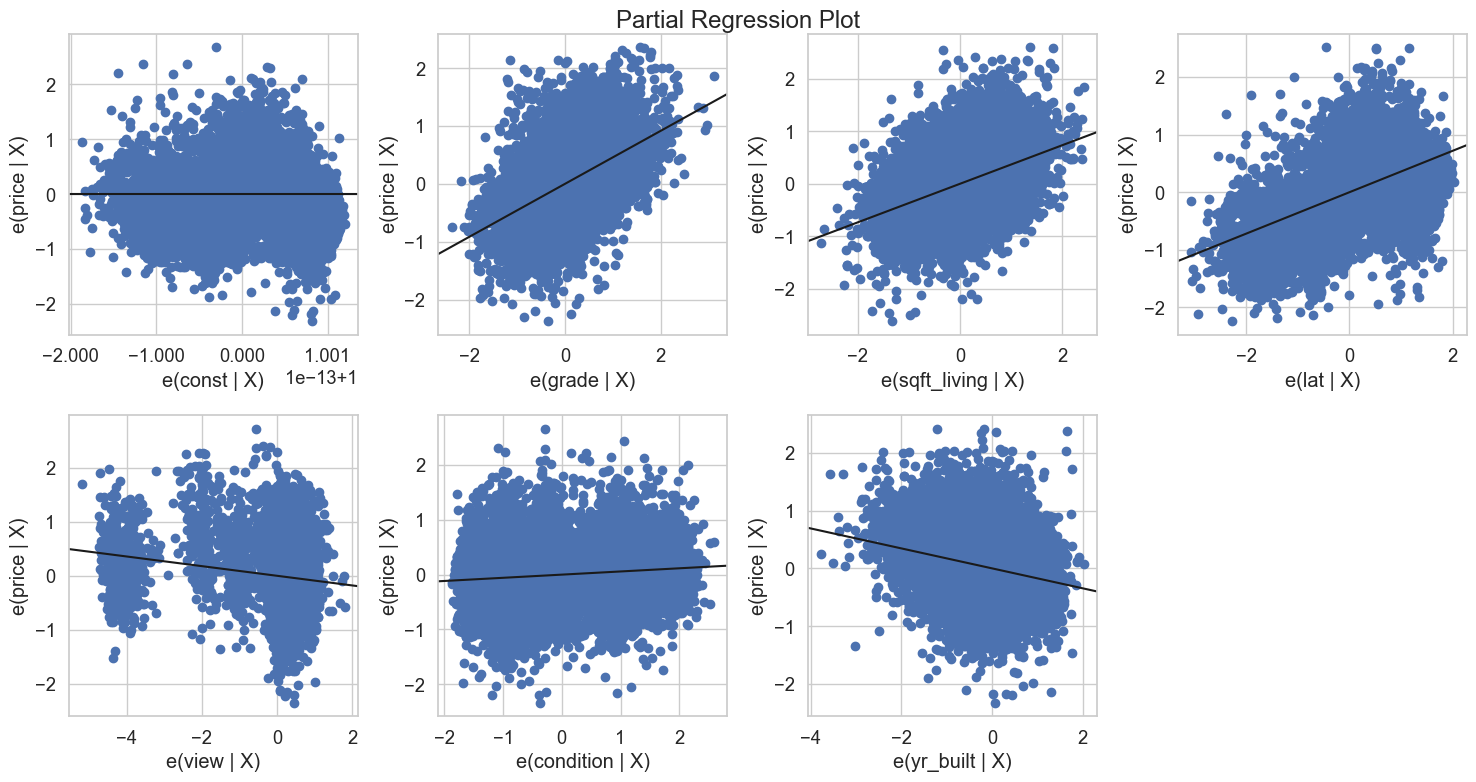

In [55]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_partregress_grid(model4,exog_idx=list(X4.columns.values),grid=(2,4),fig=fig)
plt.show()

In [56]:
# Print the summary statistics
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     7411.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        23:03:31   Log-Likelihood:                -11427.
No. Observations:               15429   AIC:                         2.287e+04
Df Residuals:                   15422   BIC:                         2.292e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         2.03e-14      0.004   4.97e-12      

### Analysis of model 4.
The results show the summary of a linear regression model with price as the dependent variable and grade, sqft_living, lat, view, condition, and yr_built as the independent variables

- R-squared: The R-squared value is 0.742, which means that approximately 74.2% of the variation in the price can be explained by the grade, sqft_living, lat, view, condition, and yr_built variables in the model. This indicates a relatively high level of goodness-of-fit, suggesting that these variables have substantial predictive power in determining the price.

- Adjusted R-squared: The adjusted R-squared value is the same as the R-squared value (0.742) in this case, indicating that there is no penalty for the number of predictors in the model. This suggests that the inclusion of grade, sqft_living, lat, view, condition, and yr_built as independent variables has adequately accounted for the complexity of the model.

- F-statistic: The F-statistic has a high value of 7411, and the associated p-value is 0.00. This indicates that there is a significant relationship between the independent variables (grade, sqft_living, lat, view, condition, and yr_built) and the dependent variable (price), as the p-value is less than the conventional threshold of 0.05. Therefore, the overall model is statistically significant.

- Coefficients: The coefficient for the constant term is very close to zero (2.03e-14), indicating that it does not have a substantial impact on the price. The coefficient for the grade variable is 0.4583, suggesting that for each unit increase in grade, there is a corresponding increase in the price by 0.4583 units. The coefficient for the sqft_living variable is 0.3668, indicating that for each unit increase in sqft_living, there is a corresponding increase in the price by 0.3668 units. The coefficient for the lat variable is 0.3591, suggesting that for each unit increase in lat, there is a corresponding increase in the price by 0.3591 units. The coefficient for the view variable is -0.0895, indicating that the presence of a view is associated with a decrease in the price by 0.0895 units. The coefficient for the condition variable is 0.0578, suggesting that for each unit increase in condition, there is a corresponding increase in the price by 0.0578 units. The coefficient for the yr_built variable is -0.1728, indicating that for each unit increase in yr_built, there is a corresponding decrease in the price by 0.1728 units.

- Standard Errors and t-statistics: The standard errors provide an estimate of the uncertainty in the coefficient estimates. The t-statistics for all the variables are high, and the associated p-values are 0.000. This indicates that all the coefficients are statistically significant, suggesting that grade, sqft_living, lat, view, condition, and yr_built have a strong impact on the price.

- Confidence Intervals: The 95% confidence intervals for the coefficients indicate that we can be 95% confident that the true population values of these coefficients lie within their respective intervals.

- Residuals: The Omnibus test, Jarque-Bera test, and skewness and kurtosis values assess the normality assumption of the residuals. The Omnibus test has a low probability value (0.000), indicating that the residuals deviate significantly from a normal distribution. The skewness value (0.196) is close to zero, suggesting a relatively symmetrical distribution. The kurtosis value (3.896) indicates a moderate level of peakedness in the distribution of the residuals.

The analysis indicates that the grade, sqft_living, lat, view, condition, and yr_built variables have a significant impact on the price. However, it's important to consider the limitations of the model and conduct further analysis to assess the adequacy of the model's assumptions and potential inclusion of additional variables to improve the model's performance.

### The Final model

In [57]:
#we will add four more independent variables,
#the independent variable we will add are 'waterfront','year built','bathrooms', 'floors'
#'bedrooms','sqft_living15'
Xfinal = kingCountySales[['grade','sqft_living','lat','view','condition',
                          'yr_built','waterfront','bathrooms','bedrooms','sqft_living15', 'floors']]
y = kingCountySales['price']

# Add a constant term to the independent variables
Xfinal = sm.add_constant(Xfinal)

# Fit the model
finalModel = sm.OLS(y, Xfinal).fit()


In [58]:
# fig = plt.figure(figsize=(15,8))
# sm.graphics.plot_partregress_grid(finalModel,exog_idx=list(Xfinal.columns.values),grid=(2,4),fig=fig)
# plt.show()

In [59]:
# Print the summary statistics
print(finalModel.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     4582.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        23:03:32   Log-Likelihood:                -10696.
No. Observations:               15429   AIC:                         2.142e+04
Df Residuals:                   15417   BIC:                         2.151e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.021e-14      0.004   5.18e-12

### Analysis of the final model
- R-squared: The R-squared value is 0.766, indicating that approximately 76.6% of the variation in the price can be explained by the included independent variables. This suggests a reasonably good fit for the model in explaining the variability in the price.

- Adjusted R-squared: The adjusted R-squared value is the same as the R-squared value (0.766) in this case. This suggests that the selected independent variables have adequately accounted for the complexity of the model.

- F-statistic: The F-statistic has a high value of 4582, and the associated p-value is 0.00. This implies that the overall model is statistically significant, indicating that the included independent variables collectively have a significant impact on the price.

- Standard Errors and t-statistics: The standard errors provide information about the precision of the coefficient estimates. The t-statistic measures the significance of each coefficient, and the associated p-values indicate whether the coefficients are statistically significant. In this case, all the coefficients are statistically significant as their p-values are below 0.05.

- Confidence Intervals: The 95% confidence intervals provide a range within which we can be 95% confident that the true population values of the coefficients lie. These intervals can be used to assess the precision and uncertainty associated with the coefficient estimates.

- Omnibus, Jarque-Bera, Skewness, and Kurtosis: These statistics assess the normality assumption of the residuals. The Omnibus test and Jarque-Bera test both indicate a deviation from normality. The skewness value (0.100) close to zero suggests a relatively symmetrical distribution, and the kurtosis value (3.872) indicates a moderate level of peakedness in the distribution of the residuals.

- Condition Number: The condition number of 5.40 suggests a moderate level of multicollinearity in the independent variables. A condition number above 30 or 50 is often considered indicative of strong multicollinearity.

- Durbin-Watson statistic is reported to be approximately 1.999. This value is close to 2, suggesting that there is no significant autocorrelation present in the residuals. This indicates that the assumption of independence of residuals is likely satisfied in the regression model.

### visualizing the chosen independent variables

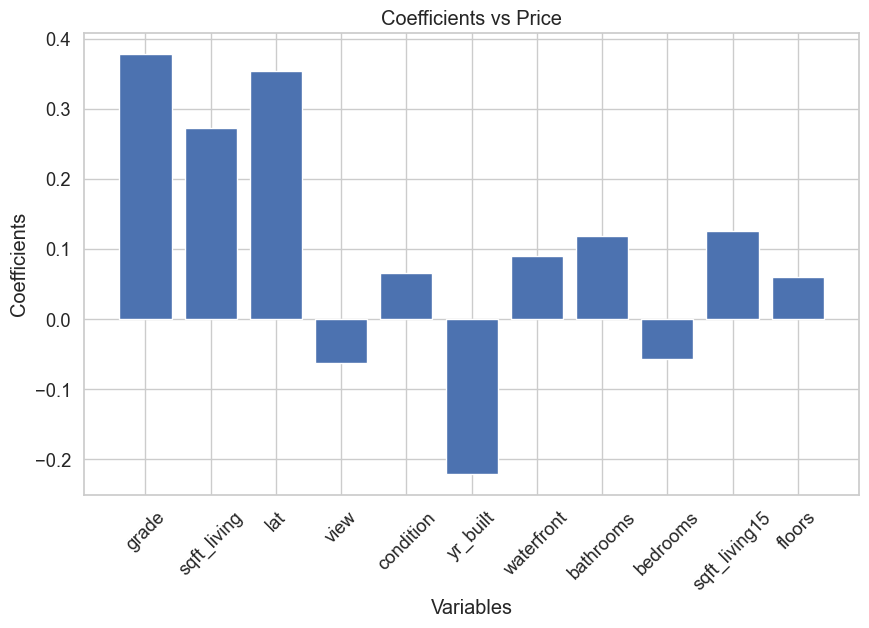

In [60]:
# Coefficients and their labels
coefficients = [0.3782, 0.2727, 0.3543, -0.0627, 0.0660, -0.2208, 0.0902, 0.1180, -0.0562, 0.1252, 0.0598]
labels = ['grade', 'sqft_living', 'lat', 'view', 'condition', 'yr_built', 'waterfront', 'bathrooms', 'bedrooms', 'sqft_living15', 'floors']

# Plotting the coefficients against price
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(labels, coefficients)
ax.set_xlabel('Variables')
ax.set_ylabel('Coefficients')
ax.set_title('Coefficients vs Price')

# Adjusting the rotation of x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()


### Analysis of the independent variables' coefficients

- Coefficients:  The coefficients in the regression results represent the estimated effects of the independent variables on the dependent variable (price). Here is the analysis of the coefficients:

1. const: The coefficient for the constant term is approximately 2.021e-14. This term represents the estimated price when all other independent variables are zero. In this case, it is very close to zero, suggesting that it doesn't have a substantial impact on the price prediction.

2. grade: The coefficient for the grade variable is 0.3782. A one-unit increase in the grade is associated with an estimated increase in price by 0.3782 units, holding other variables constant. This indicates that a higher grade of a property is positively associated with its price.

3. sqft_living: The coefficient for sqft_living is 0.2727. It suggests that a one-unit increase in the square footage of the living area is associated with an estimated increase in price by 0.2727 units, holding other variables constant. This indicates a positive relationship between the size of the living area and the price.

4. lat: The coefficient for lat is 0.3543. It implies that a one-unit increase in latitude is associated with an estimated increase in price by 0.3543 units, holding other variables constant. This suggests that properties located at higher latitudes tend to have higher prices.

5. view: The coefficient for the view variable is -0.0627. It suggests that a one-unit increase in the view score is associated with an estimated decrease in price by 0.0627 units, holding other variables constant. This indicates that a better view is associated with a lower price.

6. condition: The coefficient for condition is 0.0660. It implies that a one-unit increase in the condition score is associated with an estimated increase in price by 0.0660 units, holding other variables constant. This suggests that a better condition of the property is associated with a higher price.

7. yr_built: The coefficient for yr_built is -0.2208. It indicates that a one-unit increase in the year built is associated with an estimated decrease in price by 0.2208 units, holding other variables constant. This suggests that older properties tend to have lower prices.

8. waterfront: The coefficient for the waterfront variable is 0.0902. It suggests that a property being waterfront is associated with an estimated increase in price by 0.0902 units, holding other variables constant. This indicates that waterfront properties tend to have higher prices.

9. bathrooms: The coefficient for bathrooms is 0.1180. It implies that a one-unit increase in the number of bathrooms is associated with an estimated increase in price by 0.1180 units, holding other variables constant. This suggests that properties with more bathrooms tend to have higher prices.

10. bedrooms: The coefficient for bedrooms is -0.0562. It suggests that a one-unit increase in the number of bedrooms is associated with an estimated decrease in price by 0.0562 units, holding other variables constant. This indicates that properties with more bedrooms tend to have lower prices.

11. sqft_living15: The coefficient for sqft_living15 is 0.1252. It indicates that a one-unit increase in the square footage of the living area of nearby properties (in 15 neighbors) is associated with an estimated increase in price by 0.1252 units, holding other variables constant. This suggests a positive relationship between the size of nearby properties and the price.

12. floors: The coefficient for floors is 0.0598. It implies that a one-unit increase in the number of floors is associated with an estimated increase in price by 0.0598 units, holding other variables constant. This suggests that properties with more floors tend to have higher prices.


### Analysis of rsquared values of the models created

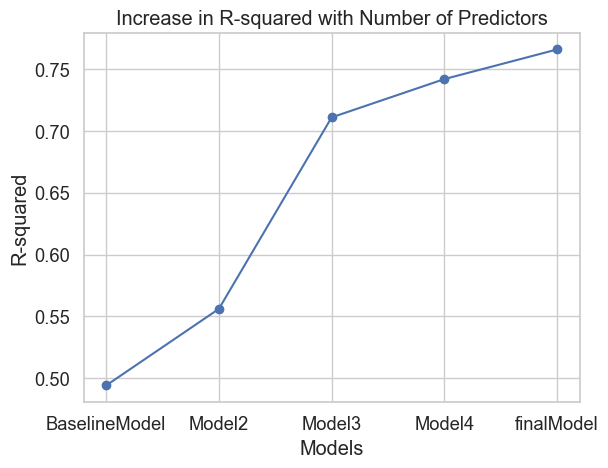

In [61]:
import matplotlib.pyplot as plt

# R-squared values for different models
r_squared = [0.494, 0.556, 0.711, 0.742, 0.766]

# Number of predictors in each model
predictors = ['BaselineModel', 'Model2', 'Model3', 'Model4','finalModel']

# Plotting the R-squared values
plt.plot(predictors, r_squared, marker='o')
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.title('Increase in R-squared with Number of Predictors')
plt.xticks(predictors)
plt.show()

## Summary
Based on the analysis conducted using the multiple linear regression model, several key findings and conclusions can be drawn:

1. Model Performance: The multiple linear regression model achieved a relatively high R-squared value of 0.766, indicating that approximately 76.6% of the variability in the housing prices can be explained by the selected predictors. The model's F-statistic of 4582 indicates that the overall model is statistically significant.

2. Predictor Significance: The coefficients of the predictors provide insights into their individual impacts on housing prices. Notably, variables such as grade, sqft_living, lat, waterfront, and bathrooms have positive coefficients, indicating a positive association with the price. On the other hand, variables like view, condition, yr_built, bedrooms, sqft_living15, and floors have negative coefficients, suggesting a negative association with the price.

3. Feature Recommendations: Based on the coefficient analysis, the grade of the property appears to have the most significant positive impact on price. Therefore, for sellers, investing in home improvements or upgrades that can enhance the property's grade may help increase the selling price. Other factors like living area (sqft_living), location (lat), and waterfront view can also positively influence the price.

4. Recommendations for Buyers: Buyers looking for the best property at an affordable price should consider factors that have a negative association with price, such as view, condition, and the number of bedrooms and floors. This knowledge can help buyers identify properties that may offer good value for their budget.

5. Assumptions and Limitations: It's important to note that the multiple linear regression model assumes a linear relationship between the predictors and the target variable, as well as certain assumptions about the error terms. Additionally, the analysis is based on the available dataset, which may have limitations in terms of data quality or representativeness.

In conclusion, the multiple linear regression model provides valuable insights into the factors influencing housing prices. By considering the recommendations and understanding the impact of different predictors, both sellers and buyers can make more informed decisions in the real estate market. However, it's essential to exercise caution and consider other relevant factors in conjunction with the model's findings when making real-world decisions.

## Recomendations:

### Recommendation to Seller:
Based on the regression results, the following recommendations can be made to the seller to potentially increase the house price:

1. Focus on improving the overall grade of the property: The grade variable has the largest coefficient, indicating a strong positive relationship with the price. Consider making renovations or upgrades to enhance the quality, features, and finishes of the property.

2. Enhance the living space: The sqft_living variable also has a significant positive effect on the price. Explore options to increase the square footage of the living area, such as adding extensions, finishing basements, or converting unused spaces into functional living areas.

3. Highlight the location: The lat variable, representing the latitude, has a positive coefficient. Emphasize the desirable aspects of the property's location, such as proximity to amenities, schools, transportation, or desirable neighborhoods.

4. Maximize the property's view: The view variable has a negative coefficient, indicating that properties with better views tend to have higher prices. If the property has a pleasant view, ensure that it is highlighted and well-presented to potential buyers.

5. Ensure good condition and maintenance: The condition variable has a positive coefficient, suggesting that well-maintained properties command higher prices. Prioritize regular maintenance and repairs to keep the property in excellent condition, enhancing its appeal to potential buyers.

6. Consider property age and renovations: The yr_built variable has a negative coefficient, indicating that older properties tend to have lower prices. If feasible, undertake renovations or updates to modernize the property and increase its perceived value.

7. Capitalize on waterfront features: The waterfront variable has a positive coefficient, indicating that waterfront properties generally have higher prices. If the property has waterfront access or views, emphasize these features in marketing materials and showcase their desirability.

8. Enhance bathrooms, bedrooms, and other living spaces: The coefficients for bathrooms, bedrooms, sqft_living15, and floors are all statistically significant. Consider optimizing these areas to make them more attractive and functional, such as renovating bathrooms, improving bedroom layouts, and maximizing the use of available space.

It's important to note that these recommendations are based on the regression analysis and may vary depending on specific market conditions, location, and buyer preferences.

### Recomendations to buyer
Based on the regression model results, here are some recommendations for buyers looking to purchase the best property at an affordable price:

1. Focus on the grade: Properties with higher grades tend to have higher prices. Look for properties with a decent grade that aligns with your needs and preferences. This way, you can find a property with a good balance of quality and affordability.

2. Consider the size: Square footage (sqft_living) plays a significant role in determining the price. Look for properties with a size that meets your requirements and offers good value for money. Avoid unnecessarily large properties that may come at a higher price.

3. Location matters: The latitude (lat) variable has a positive coefficient, indicating that properties in certain areas tend to have higher prices. Explore locations that offer a desirable combination of amenities, proximity to essential services, and a pleasant environment.

4. Assess the condition: The condition variable has a positive effect on price. Look for properties that are well-maintained and in good condition. By choosing a property that requires less immediate renovation or repairs, you can potentially save on additional costs.

5. Pay attention to views: The view variable has a negative coefficient, suggesting that properties with better views tend to have higher prices. If having a view is not a priority, you may be able to find more affordable options without compromising on other essential features.

6. Evaluate bedrooms, bathrooms, and living spaces: The coefficients for bedrooms, bathrooms, sqft_living15, and floors are statistically significant. Consider your needs and prioritize the number of bedrooms and bathrooms that are suitable for your household size. Evaluate the layout and functionality of the living spaces to ensure they meet your lifestyle requirements.

7. Seek expert advice: Consult with a real estate agent or professional who has knowledge of the local market. They can provide valuable insights and assist you in finding properties that offer good value for money.

8. Consider the age of the property: The yr_built variable has a negative coefficient, suggesting that older properties tend to have lower prices. Balance this with your preferences and the potential for renovations and updates.

9. Explore properties near waterfront areas: The "waterfront" variable has a positive coefficient. If proximity to waterfront locations is important to you, consider exploring properties in such areas. However, keep in mind that waterfront properties typically come at a premium.

Remember, these recommendations should be considered in conjunction with your specific preferences, budget, and local market conditions. Conduct thorough research, visit properties, and weigh various factors to make an informed decision that aligns with your needs and financial capabilities.